In [1]:
import pandas as pd
import os
import numpy as np

# fuente de datos
iris_url = "https://datahub.io/machine-learning/iris/r/iris.csv"

In [2]:
# clase data frame con metodos nuevos

class NewDataFrame(pd.DataFrame):
    '''
    Crear una clase que heredada de DataFrame de pandas que implementa
    una metodos para:
    iterar sobre las filas
    visualizar el nombre de las columnas
    generar estadísticas descriptivas sobre las variables numéricas
    generar estadística descriptiva sobre una columna numérica y su correspondiente histograma
    '''
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.__nrow = self.shape[0] - 1

    def __iter__(self):
        self.__idxrow = 0
        return self

    def __next__(self):
        if self.__idxrow <= self.__nrow:
            row = self.iloc[[self.__idxrow]]
            self.__idxrow += 1
            return row
        else:
            print("Los datos se han agotado")
            raise StopIteration
    
    def var_names(self):
        names = self.columns.to_list()
        for name in names:
            print("El dataframe contiene la variable: {}".format(name))
        return names
    
    def summarize_basic(self):
        numeric_df = self.select_dtypes(include=np.number)
        return numeric_df.describe()
    
    def summarize_column(self, column_name):
        sumarize_series = self[[column_name]].describe()
        hist_series = self.plot.hist(column=column_name)
        return sumarize_series, hist_series

In [3]:
iris_df = NewDataFrame(pd.read_csv(iris_url))
ColNames = iris_df.var_names()
ColNames

El dataframe contiene la variable: sepallength
El dataframe contiene la variable: sepalwidth
El dataframe contiene la variable: petallength
El dataframe contiene la variable: petalwidth
El dataframe contiene la variable: class


['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class']

In [4]:
describe = iris_df.summarize_basic()
describe

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


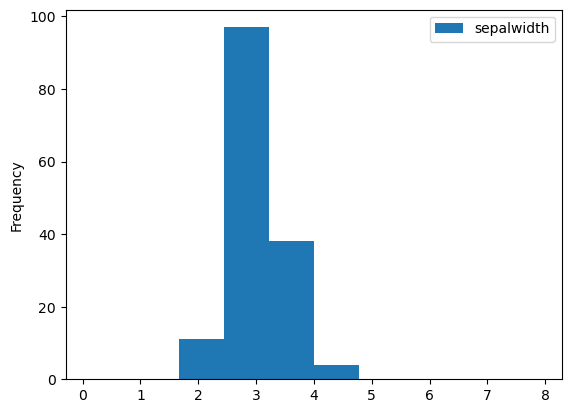

In [5]:
summary, hist = iris_df.summarize_column("sepalwidth")

In [6]:
summary

,sepalwidth
count,150.000000
mean,3.054000
std,0.433594
min,2.000000
25%,2.800000
50%,3.000000
75%,3.300000
max,4.400000
